<a href="https://colab.research.google.com/github/kerul31/Google_Colab_Modules/blob/main/Interactive_modules/STAT7030_Assignment_Module_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install saspy
import saspy
saspy

<module 'saspy' from '/usr/local/lib/python3.7/dist-packages/saspy/__init__.py'>

In [ ]:
sas = saspy.SASsession(java='/usr/bin/java', iomhost=['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'], iomport=8591, encoding='utf-8')

Using SAS Config named: default
Please enter the IOM user id: kerulsuthar@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 2561



## Q1 A substance used in biological and medical research is shipped by airfreight to users in cartons of 1000 ampules. The data below, involving 10 shipments, were collected on the number of times the carton was transferred from one aircraft to another over the shipment route (X) and the number of ampules found to be broken upon arrival (Y ).

First we input the data using datalines option in SAS.
More information on usage of DATALINES can be found in here : https://documentation.sas.com/?cdcId=vdmmlcdc&cdcVersion=8.1&docsetId=lestmtsref&docsetTarget=p0114gachtut3nn1and4ap8ke9nf.htm&locale=en



 We add two variables in this case. 
1) broken :- This represent the number of ampules that were found broken upon arrival

2) transfer:- This variable shows how many times the shipment was transfered from one aircraft to another



In [ ]:
sas.submitLST("""
data airfreight;
input broken transfer;
datalines;
16 1
9 0
17 2
12 0
22 3
13 1
8 0
15 1
19 2
11 0
;
proc print data = airfreight;
title 'Airfreight data';
 run;
""")

Obs,broken,transfer
1,16,1
2,9,0
3,17,2
4,12,0
5,22,3
6,13,1
7,8,0
8,15,1
9,19,2
10,11,0


## Q1a) Plot the number of broken ampules against the number of aircraft transfers.

We use the PROC GPLOT function as well. More information on PROC GPLOT function can be found in here: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=graphref&docsetTarget=p12onmnsmzc7hfn1lgi55vvh9lv2.htm&locale=en


Alternatively, we can use the proc sgscatter function in SAS to plot the scatter plot. More information on PROC SGSCATTER function can be found in here:
 https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=grstatproc&docsetTarget=p0lfzklhx36ylln1t9sssgzuf64m.htm&locale=en



In [ ]:
sas.submitLST("""
symbol i = RL c = black v = dot;
proc gplot data=airfreight; 
plot broken*transfer;
title 'Scatter plot for Broken Ampules vs the Number of transfers' ;
ods graphics on / width=5in height=5in;
run;
""")

Now, to represent both the plots in just one scatter plot matrix, lets first create a new variable as the log of the number of broken ampules to consider a logarithmic relationship

In [ ]:
sas.submitLST("""
data airfreight;
set airfreight;
logbroken=log(broken);
proc print data = airfreight; 
title 'Log Transformation';
run;
""")

Obs,broken,transfer,logbroken
1,16,1,2.77259
2,9,0,2.19722
3,17,2,2.83321
4,12,0,2.48491
5,22,3,3.09104
6,13,1,2.56495
7,8,0,2.07944
8,15,1,2.70805
9,19,2,2.94444
10,11,0,2.39790



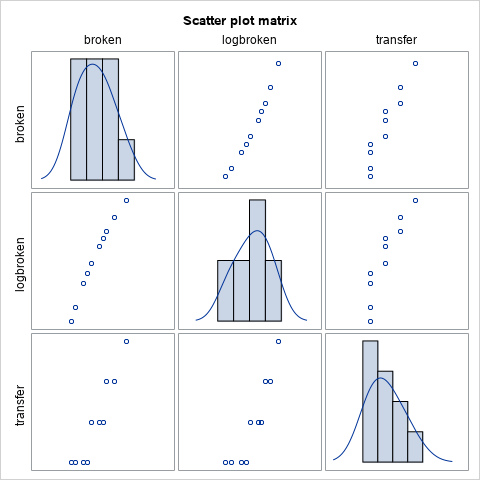

In [ ]:
sas.submitLST("""
proc sgscatter data=airfreight; 
matrix broken logbroken transfer/ diagonal=(histogram kernel);
ods graphics on / width=5in height=5in;
title 'Scatter plot matrix';
run;
""")

It might be safe to assume after examining visually that there is an overall slight increase in the number of broken ampules when the number of transfers increase.

## Q1(b)  Fit a Generalized Linear Model with Poisson distribution and log link function. Write out the fitted regression function for the number of broken ampules.

The GENMOD procedure fits generalized linear models. The class of generalized linear models is an extension of traditional linear models that allows the mean
of a population to depend on a linear predictor through a nonlinear link function and allows the response probability distribution to be any member of an exponential family of distributions.
 More information on the GENMOD procedure can be found in here:
https://support.sas.com/documentation/onlinedoc/stat/131/genmod.pdf

The poisson distribution is specified using the DIST parameter and the log function is specified using the LINK parameter indicating a logarithmic relationship between the dependent variable and the predictor.

In [ ]:
sas.submitLST("""
proc genmod data = airfreight;
model broken = transfer / dist = poi link = log p ;
title 'Model';
run;
""")

As per the parameter estimates in the table below,
the fitted regression function for the number of broken ampules is,
ŷ  = exp(2.3529 + 0.2638x)

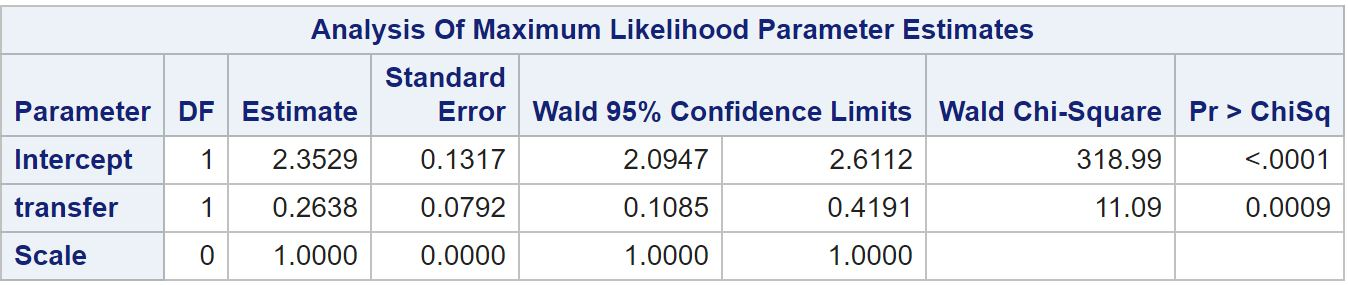









## Q1(c) Does the number of broken ampules depend on the number of transfers? Write out the null and alternative hypothesis. Report the test statistic and the conclusion.

The null and alternative hypothesis are
H0 : β = 0; H1 : β ≠ 0

The test statistic is z = 0.2638/0.0792 = 3:33 and the two-sided p-value is 0.0009

This suggests that we reject the null hypothesis safely and the number of ampules broken is significantly related to the number of aircraft transfers 

## Q1(d) What is the estimated number of broken ampules when the carton was transferred two times?

 ŷ = exp(2.3529 + 0.2638x) is the standard fitted regression function

 For 2 aircraft transfers,  ŷ = exp(2.3529 + 0.2638x) = 17.823

 The expected number of ampules broken for 2 aircraft transfers would be 17.82 (Approx 18 Ampules)


## Q1(e) Fit a GLM with identity link function instead, and repeat (b)(c)(d)

The identity link function refers to a linear relationship. This can be controlled using the LINK parameter uin the PROC GENMOD procedure.

In [ ]:
sas.submitLST("""
proc genmod data = airfreight;
model broken = transfer / dist = poi link = identity p ;
title 'Model';
run;
""")

As per the parameter estimates in the table above, the fitted regression function for the number of broken ampules is, 
ŷ  = 10.1428 + 4.0572x

The null and alternative hypothesis are
H0 : β = 0; H1 : β ≠ 0

The test statistic is z = 4.0572/1.2651 = 3.207 and the two-sided p-value is 0.0013

This suggests that we reject the null hypothesis safely and the number of ampules broken is significantly related to the number of aircraft transfers 


For 2 aircraft transfers,  ŷ = 10.1428 + (4.0572 * 2) = 18.2572
The expected number of ampules broken for 2 aircraft transfers would be 18.25 (Approx 18 Ampules) . This result is similar to the Generalized linear model when log was used as a link function.

## Q2) The 1988 General Social Survey compiled by the National Opinion Research Center asked: Do you support or oppose the following measures to deal with AIDS? (1) Have the government pay all of the health care costs of AIDS patients; (2) Develop a government information program to promote safe sex practices, such as the use of condoms." The following table summarizes opinions about health care costs (H) and the information program (I), classified also by the respondent's gender (G).

In [ ]:
sas.submitLST("""
data aids;
input gender $ information $ health $ count @@;
datalines;
male support support 76 male support oppose 160
male oppose support 6 male oppose oppose 25
female support support 114 female support oppose 181
female oppose support 11 female oppose oppose 48
proc print data = aids;
title 'Aids dataset';
run;
""")

Obs,gender,information,health,count
1,male,support,support,76
2,male,support,oppose,160
3,male,oppose,support,6
4,male,oppose,oppose,25
5,female,support,support,114
6,female,support,oppose,181
7,female,oppose,support,11
8,female,oppose,oppose,48


With Panel plots categorical variables can be grouped to provide useful information and sumarize our data based on certain groupings. In the plots below you will be able to see How many men and wome have opposed either health or information practices.


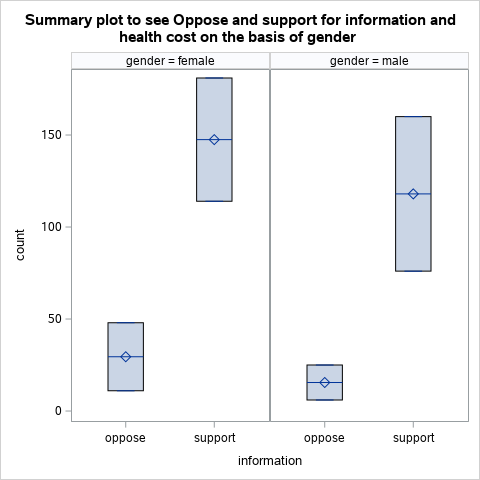
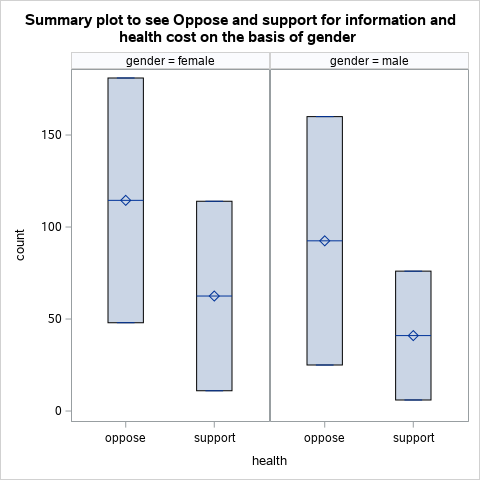
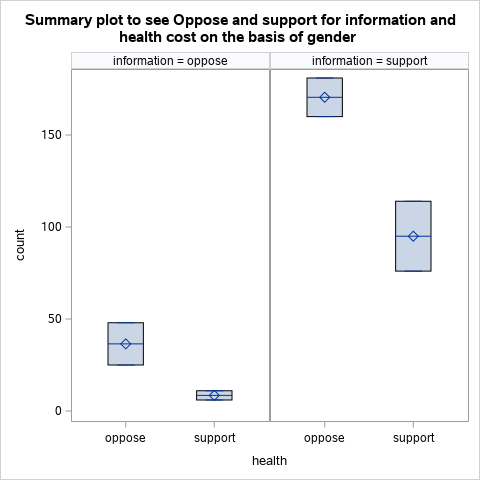

In [ ]:
sas.submitLST("""

proc sgpanel data=aids;
panelby gender / rows=1 columns=2;
vbox count / category= information ;
title 'Summary plot to see Oppose and support for information and health cost on the basis of gender';
run;





""")

### **Question: Panel by gender and categorize by health**

In [ ]:
#########################################

      # Add your code in here #

#########################################

### **Question: Panel by information and categorize by health**

In [ ]:
#########################################

      # Add your code in here #

#########################################

## Q2 (a)  Fit loglinear models (GH, GI), (GH, HI), (GI, HI), and (GH, GI, HI). Which model do you think is the best? Why?

In [ ]:
sas.submitLST("""
proc genmod data = aids;
class gender information health;
model count = gender*health gender*information / dist=poi link=log p;
title 'GH,GI';
run;
""")

In [ ]:
sas.submitLST("""
proc genmod data = aids;
class gender information health;
model count = gender*health health*information / dist=poi link=log p;
title 'GH,HI';
run;
""")


In [ ]:
sas.submitLST("""
proc genmod data = aids;
class gender information health;
model count =  gender*information health*information  / dist=poi link=log p;
title 'GI,HI';
run;
""")

In [ ]:

sas.submitLST("""
proc genmod data = aids;
class gender information health;
model count = gender*health gender*information health*information / dist=poi link=log p;
title 'GH,GI,HI';
run;
""")

Model (GH, GI) fits data poorly, while the other three
models are acceptable. We prefer to model (GI, HI) because it only contains two
two-factor interactions and has less deviance than (GH, HI).


## Q2(b) For model (GH, GI, HI), calculate GH conditional odds ratio and GI conditional odds ratio.

Consider model (GH, GI, HI), the GH conditional odds ratio is e^0.2516 = 0.7776,
and GI conditional odds ratio is e^0.4636 = 1.5898.


## Q3(c) Calculate 95% confidence intervals for the two conditional odds ratios in (b).

Consider model (GH, GI, HI), a 95% confidence interval for the GH conditional
odds ratio is
exp(-0.2516 ± 1.96 x 0.1749) = (e^0.5945 , e^0.0913) = (0.5518 , 1.0956)   
and a 95% confidence interval for the GI conditional odds ratio is
exp(0.4636 ± 1.96 x 0.2406) = (e^0.0080 , e^0.9352) = (0.9920 , 2.5477).

## Q3(d) According to the odds ratios and their confidence intervals, interpret the gender effect on opinions for these issues.

The both confidence intervals include 1, which indicates that gender has no significant effect on opinion for these issues.



## Problem 3:- Clogg (1982) reported results from the General Social Survey relating the happiness level of 1517 respondents ((1) Not too happy"; (2) Pretty happy"; (3 Very happy") to the person's level of schooling and number of siblings.


Binary responses (for example, success and failure), ordinal responses (for example, normal, mild, and severe), and nominal responses (for example, major TV networks viewed at a certain hour) arise in many fields of study. Logistic regression analysis is often used to investigate the relationship between these discrete responses and a set of explanatory variables. PROC LOGISTIC is similar to the PROC REG procedure. More information regarding the same can be found in here: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.4&docsetId=statug&docsetTarget=statug_logistic_gettingstarted.htm&locale=en


In [ ]:
sas.submitLST("""
data happiness;
input school $ siblings $ happiness count @@;
datalines;
<12 0-1 1 15 12 0-1 1 34 13-16 0-1 1 36 17+ 0-1 1 22
<12 2-3 1 61 12 2-3 1 31 13-16 2-3 1 60 17+ 2-3 1 46
<12 4-5 1 25 12 4-5 1 26 13-16 4-5 1 35 17+ 4-5 1 45
<12 6-7 1 30 12 6-7 1 13 13-16 6-7 1 8 17+ 6-7 1 18
<12 8+ 1 14 12 8+ 1 3 13-16 8+ 1 3 17+ 8+ 1 4
<12 0-1 2 17 12 0-1 2 53 13-16 0-1 2 70 17+ 0-1 2 67
<12 2-3 2 79 12 2-3 2 60 13-16 2-3 2 96 17+ 2-3 2 45
<12 4-5 2 40 12 4-5 2 31 13-16 4-5 2 63 17+ 4-5 2 74
<12 6-7 2 39 12 6-7 2 24 13-16 6-7 2 7 17+ 6-7 2 15
<12 8+ 2 15 12 8+ 2 9 13-16 8+ 2 2 17+ 8+ 2 1
<12 0-1 3 7 12 0-1 3 20 13-16 0-1 3 23 17+ 0-1 3 16
<12 2-3 3 36 12 2-3 3 5 13-16 2-3 3 12 17+ 2-3 3 11
<12 4-5 3 12 12 4-5 3 7 13-16 4-5 3 5 17+ 4-5 3 10
<12 6-7 3 4 12 6-7 3 4 13-16 6-7 3 3 17+ 6-7 3 2
<12 8+ 3 1 12 8+ 3 2 13-16 8+ 3 0 17+ 8+ 3 1
;
proc print data = happiness (obs=20); 
title 'Happiness data';
run;
""")

Obs,school,siblings,happiness,count
1,<12,0-1,1,15
2,12,0-1,1,34
3,13-16,0-1,1,36
4,17+,0-1,1,22
5,<12,2-3,1,61
6,12,2-3,1,31
7,13-16,2-3,1,60
8,17+,2-3,1,46
9,<12,4-5,1,25
10,12,4-5,1,26


## Q3 (a) Write down the proportional odds model. Specify the dummy variables for the number of siblings and the level of schooling using reference coding (how many dummy variables we need and what is the meaning of each dummy variable).

Here, we can form 7 dummy variables based on two groups.
 1) Based on the level of Schooling  - 3 dummy variables (Z1, Z2 and Z3)

 2) Based on siblings  - 4 dummy variables (X1, X2, X3 and X4)

In [ ]:
sas.submitLST("""
proc logistic data = happiness;
class school siblings / param = ref;
freq count;
model happiness = school siblings;
title 'Model';
run;
""")

Description of Dummy variables \
1) Based on level of schooling \
  Z1=1  if 12 years else 0 \
  Z2=1 if 13-16 years else 0 \
  Z3=1 if 17+ else 0 \

2) Based on the siblings \
  X1=1 if 0-1 else 0 \
  X2=1 if 2-3 else 0 \
  X3=1 if 4-5 else 0 \
  X4=1 if 6-7 else 0 


## Q3(b) Write down the estimated cumulative logit function for the happiness level being less than or equal to (2) Pretty happy".

The estimated cummulative logit function is 
logit[P(Y <= 2)] = 2.3569 - (0.8547 * X1) - (0.3969 * X2) - (0.4083 * X3) - (0.1153 * X4) + (0.1031 * Z1) + (0.1832 * Z2) + (0.2273 * Z3)

## Q3(c)Write down the estimated probability function for the happiness level(2) Pretty happy". What is the probability that one's happiness level is (2)Pretty happy" if he has 2 siblings and has 16 years of education?


The estimated probability is
P(Y=2) = [exp(logit[P(Y<=2)]) / [1+exp(logit[P(Y<=2)])]] - 
[exp(logit[P(Y<=1)]) / [1+exp(logit[P(Y<=1)])]] \

Also, 
logit[P(Y<=1) = -0.2983 - ( 0.8547 * X1 ) - ( 0.3969 * X2 ) - ( 0.4083 * X3 ) - ( 0.1153 * X4 ) + (0.1031 * Z1) + (0.1832 * Z2) + (0.2273 * Z3)   \

The estimated probability is  \
 [e^a/ (1+ e^a)] - [e^b/ (1+ e^b)] = 0.5203, \
 where,\
 a= logit[P(Y<=2)] =2.3569 - 0.3969 +0.1832 = 2.1432 and  \
 b= logit[P(Y<=1)] =-0.2983 - 0.3969 +0.1832 =-0.5120.



## Q3(d) Does the level of schooling significantly affect the happiness level? Calculate the test statistic and the degree of freedom. What is your conclusion?


As seen in the results above, the test statistic is 2.8825 with 3 degrees of freedom and the p-value is 0.41. hence we fail to reject the null hypothesis and this suggests that the level of schooling does not affect the happiness level significanlty.

## Q3(e) Calculate the cumulative odds ratio between 0-1 sibling and more than 8 siblings when the happiness is less than or equal to a certain fixed level. Also construct a 95% confidence interval for the odds ratio.


To answer this question,

In [ ]:
sas.submitLST("""
proc logistic data = happiness;
class school siblings / param = ref;
freq count;
model happiness = siblings;
title 'Model';
run;
""")

As seen in the results above, the odds ratio points estimate for siblings between 0-1 vs more than 8 siblings is 0.467 and the 95 % confidence interval is between 0.27 and 0.808.

## Q3 (f) Does the proportional odds assumption hold for this model? If not, what model should we use?



Score Test for the Proportional Odds Assumption : \
Chi-Square --> 15.3353 \
DF --> 7 \
Pr > ChiSq --> 0.0319 \

Therefor we reject the null hypothesis which means we should not use the proportional odds model for this data. We can use a baseline-category logit model instead.


## Q4 Considering a baseline-category logit model

## Q4(a) Write down the baseline-category model (baseline category is happiness = 3). State the difference between the baseline-category logit model and the proportional odds model.


In [ ]:
sas.submitLST("""
proc logistic data = happiness;
class school siblings / param = ref;
freq count;
model happiness (ref = '3') = school siblings / link=glogit;
title 'Model';
run;
""")

Here , the baseline category logit model is 

log (P(Y = j)/P(Y=3)) =  αj + (β1j * X1) + (β2j * X2) + (β3j * X3) + (β4j * X4) + (β5j * Z1) + (β6j * Z2) +(β7j * Z3),   
where j=1,2 and the baseline category is 3 which refers to "Very Happy". 

The slopes in basline ctagory model are different in different functions, but they are same for diferent functions in the proportional odds model as seen in Q3.

## Q4(b) Write down the estimated logit function for comparing happiness level (2) Pretty happy" and (3) Very happy".

Substituting the value of j =2 i.e. "Pretty happy" in the previous equation and looking up the values in the table results above,

log (P(Y = 2)/P(Y=3)) =  1.6588 - (1.090 * X1) - (0.6050 * X2) - (0.3435 * X3) - (0.0995 * X4) + (0.5758 * Z1) + (0.7669 * Z2) + (0.6178 * Z3)


## Q4(c) Calculate the conditional odds ratio between 0{1 sibling and more than 8 sibling when comparing happiness level (1) and level (3). Construct a 95% confidence interval for this conditional odds ratio. 

As seen in the last table from results above, the point estimate when calculating the xinditional odds ratio between 0-1 and more than 8 siblings is 0.204 and the 95% confidence interval is (0.0664, 0.6266).

## Q4(d) Test the effect of the level of schooling. Calculate the test statistic and the degree of freedom. What is your conclusion? (α = 5%)


As seen from the results above, 
The test statistics is 13.1 with 6 degrees of freedom. Pr > ChiSq = 0.0366. Hence we reject the null hypothesis, which means that according to this model, the level of schooling does affect the happiness level.

## Q5 Now we fit a homogenous log-linear model containing all the main effects and the two-factor interactions.

Again in here, we use the GENMOD procedure for fitting a homogenous log-linear model.

In [ ]:
sas.submitLST("""
proc genmod data = happiness;
class school siblings happiness;
model count = school siblings happiness happiness*school
happiness*siblings school*siblings / dist=poi link=log;
title 'Model';
run;
""")

## Q5(a) Write down the homogeneous loglinear model. What is the degree of freedom for the goodness-of-fit test?

The homogenous log-linear model is

log **μ**ijk = λ + λi^X + λj^Y + λk^Z +  λij^XY +  λik^ XZ + λjk^YZ


Class level information:
school-->4
siblings-->5	 
happiness-->3

The degrees of freedom are (I-1)(J-1)(K-1) =(4-1)(5-1)(3-1) =24

## Q5(b) If we treat happiness level as response, what is the corresponding logistic model for the homogeneous loglinear model? Write down this logistic model, and specify the estimated parameters.

The corresponding logistic model only contains the main eects of two explanatory variables. It is exactly the baseline-category logit model in the Problem 3.

## Q5(c) Calculate the conditional odds ratio between 0{1 sibling and more than 8 sibling when comparing happiness level (2) and level (3). Construct a 95% confidence interval for the conditional odds ratio.

When comparing the happiness level (2) and (3), the conditional odds ratio is
exp(-1.0960) = 0.3342, and a 95% confidence interval is exp(-1.0960 +- 1:96 x
0.5644) = (0.1106 , 1.0103).

## Q5(d) How to test the eect of the level of schooling on the happiness using the loglinear model? Briefly describe how to calculate the test statistic using SAS. What is the degree of freedom for this test?

We need to fit the loglinear model that exclude the happiness-schooling interaction from the homogeneous model. The test statistic is equal to the difference between -2logL of the two models, and the degree of freedom is 6.

## Q5(e) What else do you think we may need to consider in order to find a better model?

We may considering assigning scores to the ordinal explanatory variables. We may want to check the standard Pearson residuals.

